In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [145]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [146]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [147]:
df.drop(columns=["day",'month','year'],inplace=True)

In [148]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0


In [149]:
df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [150]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [151]:
df['Classes'] = df['Classes'].str.strip()


In [152]:
df.Classes.unique()


array(['not fire', 'fire'], dtype=object)

In [153]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Classes'] = LE.fit_transform(df['Classes'])

<Axes: >

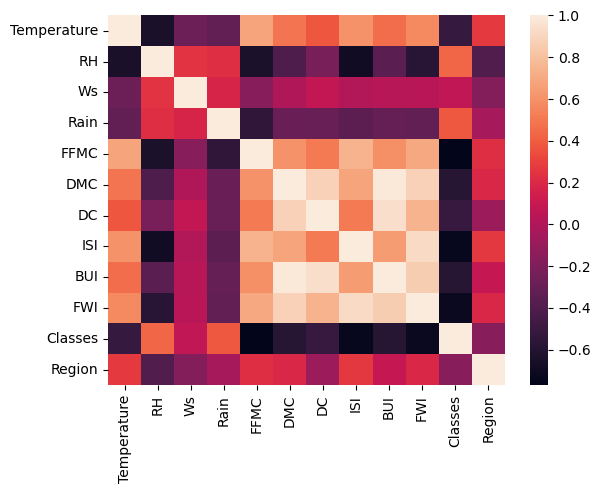

In [154]:
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True))

In [155]:
y=df['FWI'] 
x=df.drop(columns=['FWI'])

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
LR=LinearRegression(n_jobs=-1)
LR.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [157]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix =dataset.corr()
    for i in range(len(corr_matrix.columns)):
        # print(corr_matrix.iloc[i])
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [158]:
corr_features = correlation(x_train,0.85)
corr_features

{'BUI', 'DC'}

In [159]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [160]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrainscaled=scaler.fit_transform(x_train)
xtestcaled=scaler.transform(x_test)

Text(0.5, 1.0, 'x_train after scaling')

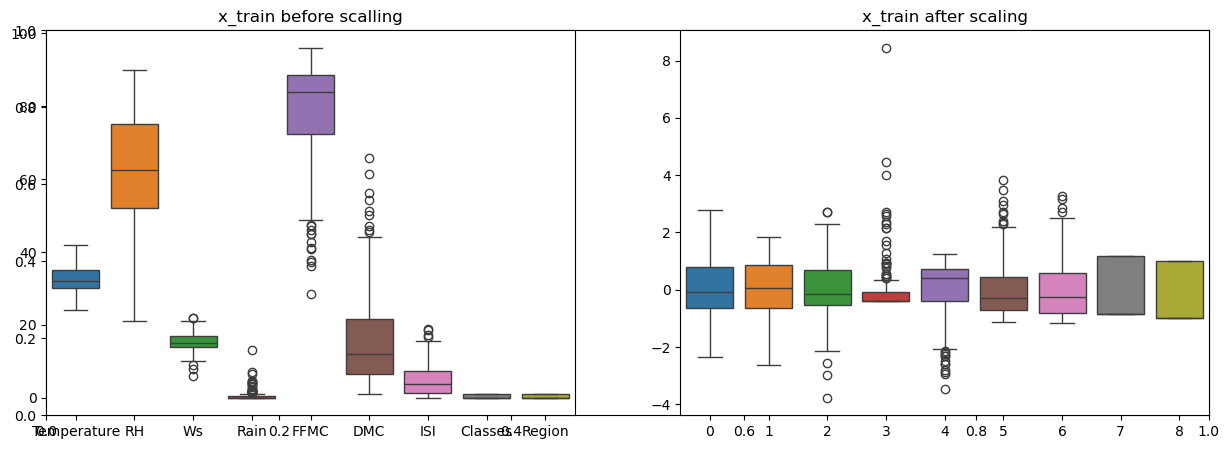

In [161]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("x_train before scalling")
plt.subplot(1,2,2)
sns.boxplot(data=xtrainscaled)
plt.title('x_train after scaling')

mean_absolute_error  0.6220907763630376
r2_score  0.9836885994922444


<Axes: xlabel='FWI'>

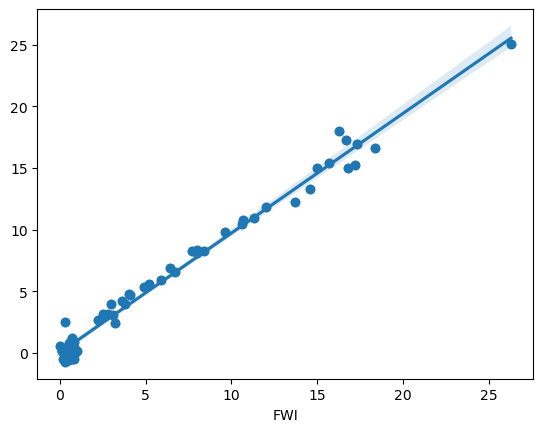

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linear = LinearRegression()
linear.fit(x_train,y_train)
y_pred = linear.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error ",mae)
print("r2_score ",score)
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred)

mean_absolute_error  0.6281656672577889
r2_score  0.9834601428608364


<Axes: xlabel='FWI'>

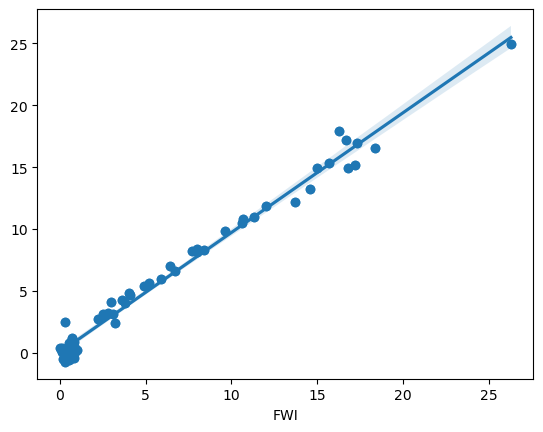

In [167]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge = Ridge()
ridge.fit(xtrainscaled,y_train)
y_pred = ridge.predict(xtestcaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error ",mae)
print("r2_score ",score)
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred)